In [2]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station_class = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# displacy columns from measurement table   
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x18ac5c5f8b0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [12]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23',)

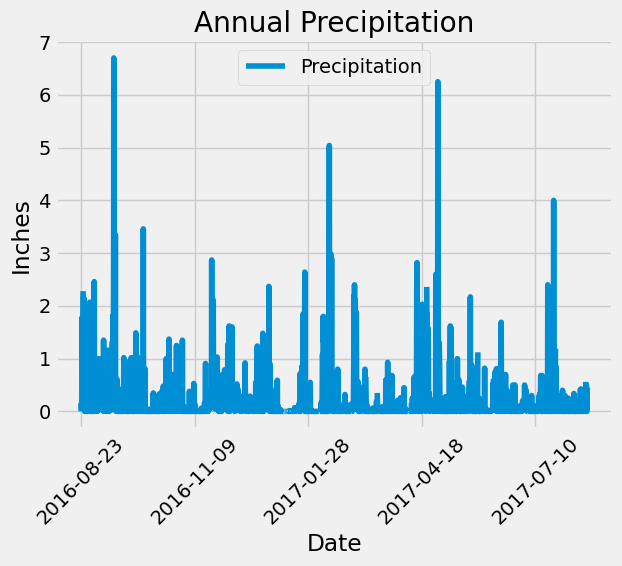

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set using datetime function
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores over the last 12 months
annual_rain = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(annual_rain, columns=['date', 'precipitation'])

# Sort the dataframe by date
rain_df.sort_values(by='date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(x='date', y='precipitation', rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Annual Precipitation")
plt.legend(["Precipitation"])
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_stats = rain_df.describe()
rain_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station_class.id).count()
station_count

9

In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_act_count = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
    
station_act_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# list of stations
station_list = session.query(station_class.station).all()
station_list

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
station_temp_stats

[(54.0, 85.0, 71.66378066378067)]

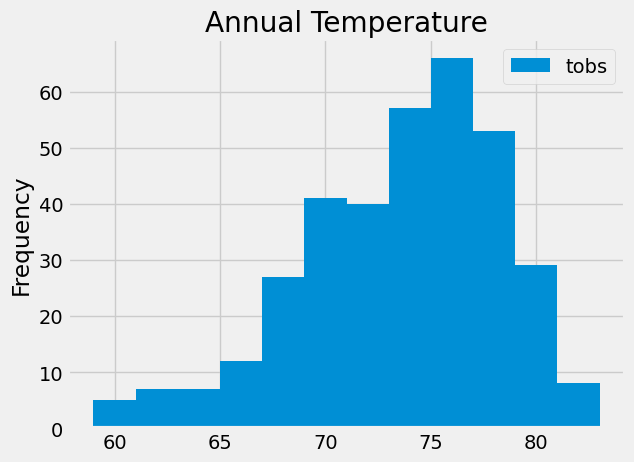

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_annual_temp = session.query(measurement.tobs, measurement.date).\
    filter(measurement.station == 'USC00519281', measurement.date >= year_ago)

# Create dataframe to use for plotting
station_annual_temp_df = pd.DataFrame(station_annual_temp, columns=['tobs', 'date'])

# Plot the results as a histogram, had to guess and check a few times to match number of bins with example
station_annual_temp_df.plot.hist(bins=12)
xlabel = "Temperature"
ylabel = "Frequency"
plt.title("Annual Temperature")
plt.legend(["tobs"])
plt.show()

In [24]:
# reviewing format of datetime output for flask app
# year_ago 

datetime.date(2016, 8, 23)

In [57]:
# testing queries for flask app

# results = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).filter(measurement.date >= year_ago).all()
# results

[(58.0, 74.59058295964125, 87.0)]

In [ ]:
# testing queries for flask app

# start = "2016-10-23"
# end = "2017-06-02"
# start_date = dt.datetime.strptime(start, "%Y-%m-%d")
# end_date = dt.datetime.strptime(end, "%Y-%m-%d")

# results = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
#         filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()
        
# results


# Close Session

In [23]:
# Close Session
session.close()